# Step 1:
* Make Necessary Imports 


In [7]:
try:
    import pandas as pd 
    import os 
    import sys
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt 
    
    %matplotlib inline 
    
    print("All Modules are Loaded ...  ")
    
except Exception as e:
    
    print("Some Modules are missing {}".format(e))

All Modules are Loaded ...  


In [8]:
for x in os.listdir():
    print(x)

.DS_Store
20190928-items.csv
20190928-reviews.csv
.ipynb_checkpoints
Analysis.ipynb


# Step 2:
* know you dataset well 

In [11]:
df = pd.read_csv("20190928-items.csv")
df.head(2)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95


In [15]:
df.describe()

,rating,totalReviews
count,792.000000,792.000000
mean,3.607576,104.231061
std,0.668730,166.242503
min,1.000000,1.000000
25%,3.200000,7.000000
50%,3.700000,31.500000
75%,4.000000,122.250000
max,5.000000,984.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
asin            792 non-null object
brand           792 non-null object
title           792 non-null object
url             792 non-null object
image           792 non-null object
rating          792 non-null float64
reviewUrl       792 non-null object
totalReviews    792 non-null int64
prices          577 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 55.8+ KB


In [20]:
df.isna().count()

asin            792
brand           792
title           792
url             792
image           792
rating          792
reviewUrl       792
totalReviews    792
prices          792
dtype: int64

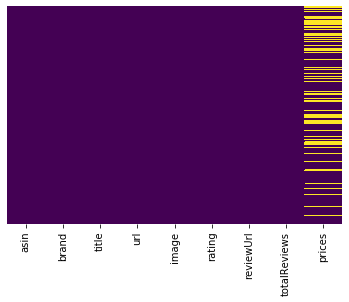

In [21]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

* This shows that columns Prices have some Null or missing Values 

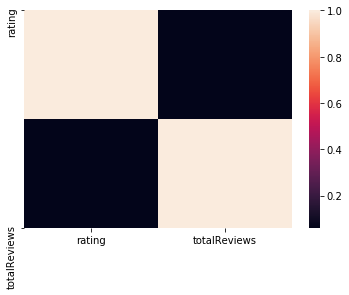

In [23]:
sns.heatmap(df.corr())

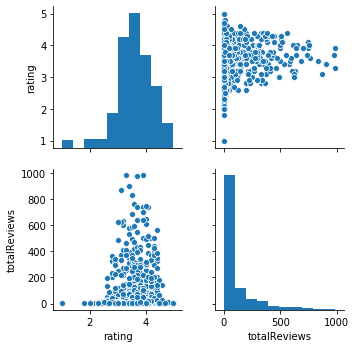

In [22]:
sns.pairplot(df)

# Step 2:
* Answering the Questions 

###### Q) How many Brands are there ?

In [28]:
print(df["brand"].nunique())
df["brand"].unique()

10


array(['Nokia', 'Motorola', 'Sony', 'Samsung', 'HUAWEI', 'Apple',
       'OnePlus', 'Google', 'ASUS', 'Xiaomi'], dtype=object)

##### Q) How Many Brands of Mobile have Maximum ratings 

In [37]:
print(df["brand"][df["rating"] == df["rating"].max()].nunique())
print(print(df["brand"][df["rating"] == df["rating"].max()].unique()))

7
['Samsung' 'Motorola' 'Google' 'Sony' 'Xiaomi' 'Apple' 'ASUS']
None


##### Q) How many  brands has Mininum Ratings what are their names 

In [39]:
print(df["brand"][df["rating"] == df["rating"].min()].nunique())
print(print(df["brand"][df["rating"] == df["rating"].min()].unique()))

4
['Motorola' 'Samsung' 'Apple' 'OnePlus']
None


#### Q) Which Brand has Maximum Number of reviews 

In [46]:
df[["brand", "prices"]][df["totalReviews"] == df["totalReviews"].max()]

,brand,prices
352,Google,$107.70


##### Q) Tell me which brand has maximum rating/review ratio 

In [44]:
df.head(2)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95


In [47]:
df["rating/review"] = df["rating"]/df["totalReviews"]

In [48]:
df.head(2)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices,rating/review
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,0.214286
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95,0.414286


In [54]:
df["brand"][df["rating/review"] == df["rating/review"].max()].unique()

array(['Samsung', 'Sony', 'Xiaomi', 'ASUS', 'Motorola', 'Google'],
      dtype=object)

### Tell me brand that has maximum numbers of reviews and how many ?

In [61]:
df1 = df.groupby(by='brand').count()

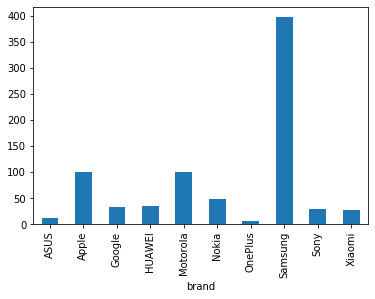

In [64]:
df1["totalReviews"].plot(kind='bar')

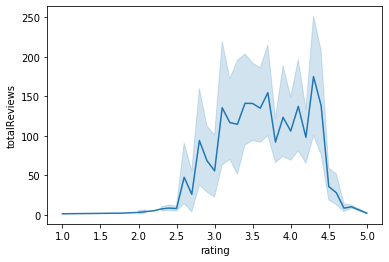

In [71]:
sns.lineplot(x=df["rating"], y=df["totalReviews"])

In [99]:
df.head(2)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices,rating/review
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,0.214286
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95,0.414286


In [106]:
df1 = df.groupby(by='brand').mean()

In [110]:
df1["rating"]

brand
ASUS        3.776923
Apple       3.527723
Google      3.763636
HUAWEI      4.019444
Motorola    3.528000
Nokia       3.322449
OnePlus     3.342857
Samsung     3.573300
Sony        3.731034
Xiaomi      4.337037
Name: rating, dtype: float64

Text(0.5, 1.0, 'Brands vs Average Ratings ')

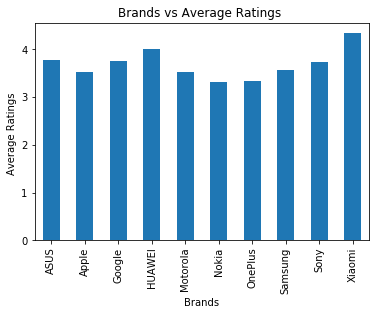

In [115]:

df1["rating"].plot(kind='bar')
plt.xlabel("Brands")
plt.ylabel("Average Ratings ")
plt.title("Brands vs Average Ratings ")


Text(0.5, 1.0, 'Average Total Review vs Brands ')

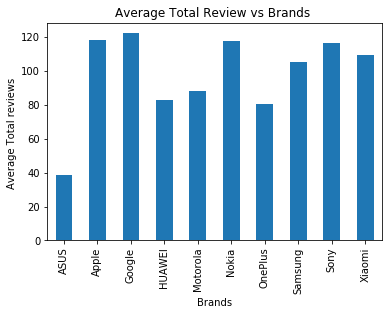

In [119]:
df1["totalReviews"].plot(kind='bar')
plt.xlabel("Brands")
plt.ylabel("Average Total reviews ")
plt.title("Average Total Review vs Brands ")